#### Do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
#### Plot bar charts showing impact of employee salaries on retention
#### Plot bar charts showing corelation between department and employee retention
#### Now build logistic regression model using variables that were narrowed down in step 1
#### Measure the accuracy of the model 

In [121]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


In [122]:
df = pd.read_csv("HR_data.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<h2 style="color:blue">EDA and Data Visualization</h2>

In [123]:
left=df[df.left==1]      #filter column left with value=1
left.shape

(3571, 10)

In [124]:
retained=df[df.left==0]      #filter column left with value=1
retained.shape

(11428, 10)

In [125]:
average = df.groupby('left')[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident']].mean()
average

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident
left,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326


From above table we can draw following conclusions,

Satisfaction Level: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
Average Monthly Hours: Average monthly hours are higher in employees leaving the firm (199 vs 207)
Promotion Last 5 Years: Employees who are given promotion are likely to be retained at firm

<h2 style="color:blue">Impact of salary on employee retention</h2>




<Axes: xlabel='salary'>

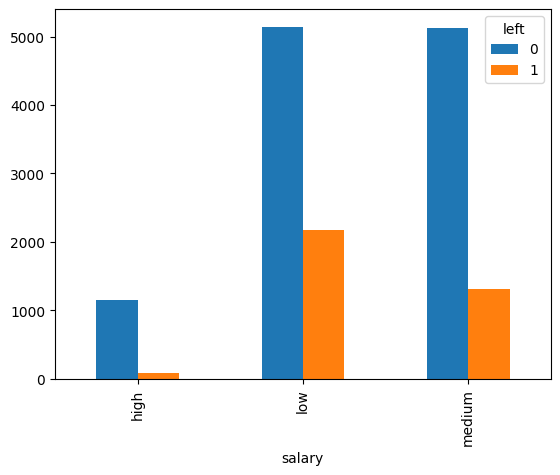

In [126]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

<h2 style="color:blue">Department wise employee retention rate</h2>

<Axes: xlabel='Department'>

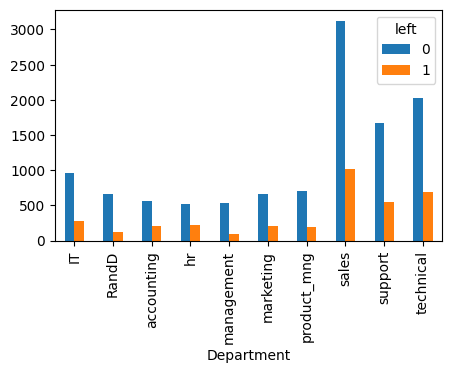

In [127]:
pd.crosstab(df.Department,df.left).plot(kind='bar',figsize=(5,3))


From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

In [128]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


 #### Tackle salary dummy variable

In [129]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [130]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [131]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [132]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [133]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [134]:
y = df.left


In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)


In [136]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [137]:

model = LogisticRegression(solver='sag', max_iter=2000)


In [138]:
model.fit(X_train, y_train)


LogisticRegression(max_iter=2000, solver='sag')

In [139]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

<h2 style="color:blue">Accuracy of the model</h2>

In [141]:
model.score(X_test,y_test)


0.7839047619047619